<a href="https://colab.research.google.com/github/syma-afsha/AI_LAB/blob/main/Regularization_solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L08%20-%20Regularization_solved.ipynb)

# Labor 08 - Regularisation of Linear Regression and Bias - Variance

### Water flow

In the first part of the exercise, a linear regression is implemented to predict the amount of water spilled from a tank based on how much water is in the tank. In the second half of the exercise, we observe the debugging of the learning algorithms and the bias and variance type errors.

### 1: Import, load and visualise data

In [7]:
!pip install tensorflow
!pip install keras

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as op

# keras imports for the dataset and building our neural network
from keras.models import Sequential
# Instead of keras.layers.core, use keras.layers
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers


from numpy.random import seed


### 2: Load data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [9]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/Lab8data.mat
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/w_final.txt

--2024-12-19 06:14:36--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab08/Lab8data.mat
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab08/Lab8data.mat [following]
--2024-12-19 06:14:37--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab08/Lab8data.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1321 (1.3K) [application/octet-stream]
Saving to: ‘Lab8data.mat’

Lab8data.mat        100%[===================>]   1.29K  --.-KB/s    in 0s      

2024-12-19 06:14:37 (41.7 MB/s) - ‘Lab8data.mat’ saved [1

Load in the data! Use the Pandas package to do this and then convert it into a numpy array.

In [10]:
data = loadmat("Lab8data.mat")
X_train = data["X"]
Y_train = data["y"]
X_val   = data["Xval"]
Y_val   = data["yval"]
X_test  = data["Xtest"]
Y_test  = data["ytest"]

del data
m,n = X_train.shape
print('Shape of X:', X_train.shape)
print('Shape of Y:', Y_train.shape)

Shape of X: (12, 1)
Shape of Y: (12, 1)


### 3: Visualization

Let's vizualise the data set to understand it more.

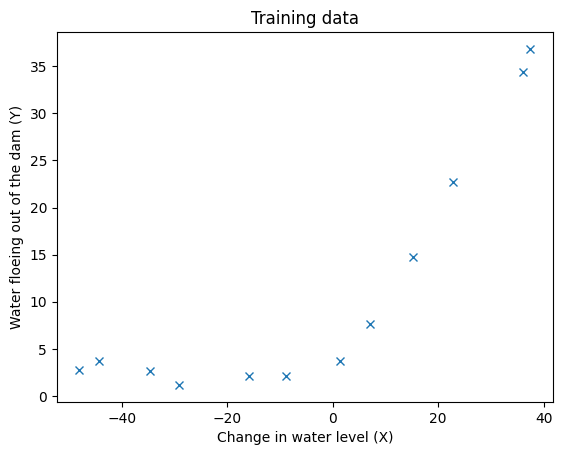

In [11]:
plt.plot(X_train,Y_train,'x')
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.show()

Machine learning goes as far as deep learning. The limit is the single layer neural network. With this in mind, let's return to the punishment process introduced in lab L04, now using neural network packages.

### Linearized regression with regularization

We will create a network corresponding to a linear regression, which in our case will be based on 1 input variable and will consist of 1 layer containing 1 neuron. The BIAS tag will be added naturally and a penalty tag will be added. Two commonly used penalty methods are L1 and L2.

#### L2 regularizáció (Ridge regression)
$ C(w)=\frac{1}{2m}\sum_{i=1}^m(h_w(x^i)-y^i)^2+ \color{red}{\lambda\sum_{j=1}^nw_j^2} $

This technique can be used to prevent over fitting. $\lambda $  should be choosen wisely. Setting it too high can result in under fitting.

#### L1 regularisation (Lasso regression)
$ C(w)=\frac{1}{2m}\sum_{i=1}^m(h_w(x^i)-y^i)^2+ \color{red}{\lambda\sum_{j=1}^n|w_j|} $

This technique can also reduce certain coefficients to 0, so it is useful for input parameter selection.

Vizsgáljuk meg az alábbi háló összeállítást.

Let's do the prediction.

In [13]:
# Underfit Case
Lambda = 0
lr_rate = 0.005
epoch = 100

# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(1, input_shape=(1,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))

# compiling the sequential model
# Change 'lr' to 'learning_rate'
sgd = optimizers.Adam(learning_rate=lr_rate)
model.compile(loss='MSE', optimizer=sgd)

# training the model and saving metrics in history
history = model.fit(X_train, Y_train, epochs=epoch, validation_data=(X_val, Y_val), verbose = 2)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 - 1s - 1s/step - loss: 1352.1792 - val_loss: 1468.8915
Epoch 2/100
1/1 - 0s - 174ms/step - loss: 1342.1715 - val_loss: 1458.3376
Epoch 3/100
1/1 - 0s - 129ms/step - loss: 1332.2080 - val_loss: 1447.8308
Epoch 4/100
1/1 - 0s - 56ms/step - loss: 1322.2894 - val_loss: 1437.3721
Epoch 5/100
1/1 - 0s - 85ms/step - loss: 1312.4167 - val_loss: 1426.9615
Epoch 6/100
1/1 - 0s - 119ms/step - loss: 1302.5900 - val_loss: 1416.6006
Epoch 7/100
1/1 - 0s - 69ms/step - loss: 1292.8104 - val_loss: 1406.2898
Epoch 8/100
1/1 - 0s - 142ms/step - loss: 1283.0786 - val_loss: 1396.0293
Epoch 9/100
1/1 - 0s - 144ms/step - loss: 1273.3950 - val_loss: 1385.8206
Epoch 10/100
1/1 - 0s - 68ms/step - loss: 1263.7606 - val_loss: 1375.6638
Epoch 11/100
1/1 - 0s - 138ms/step - loss: 1254.1757 - val_loss: 1365.5598
Epoch 12/100
1/1 - 0s - 79ms/step - loss: 1244.6412 - val_loss: 1355.5095
Epoch 13/100
1/1 - 0s - 76ms/step - loss: 1235.1576 - val_loss: 1345.5127
Epoch 14/100
1/1 - 0s - 134ms/step - loss: 1225.7250 - 

In [ ]:
################### CODE HERE ########################
# Implement the prediction step.
# Use the predict() function of the model

Y_pred = model.predict(X_test)

######################################################

Plot the result.

In [ ]:
plt.plot(X_train,Y_train,'x')   # adatok megjelenítése
plt.plot(X_test,Y_pred,'x', color='red')   # adatok megjelenítése
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Training data', 'Prediction (on Test data)'])
plt.show()

In line with our expectations and our simple model design, we obtained a linear estimate that does not seem to adequately capture our data. Using the built-in metrics, we can examine the running of the cost function on the training and validation data. To do this, we first plot the corresponding metrics.

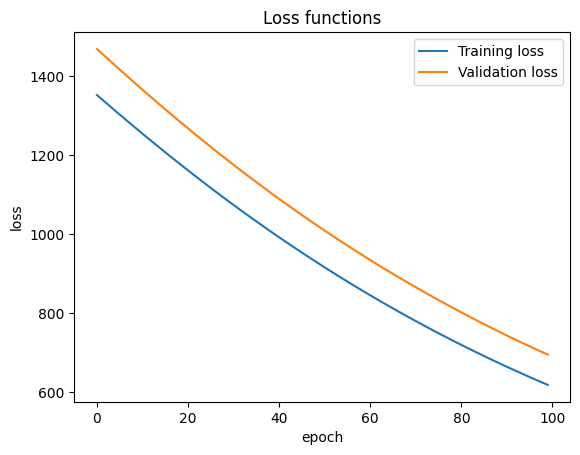

In [14]:
# plotting the metrics
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'])

In the graph, we can observe that both the cost function of the training data and the cost function of the validation data remain high. Higher than one would expect from a well-functioning predictor.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighBias.png?raw=1" width="600">

So let's change our model to get a better result.

### 4: Poly Feature

To get a better result, we need more input parameters. One possible way to generate more parameters is to take the polynomial coefficients of the available parameter and feed them into your neural network as additional parameters.

Write a function that takes as input the matrix of actual samples and enriches it with the appropriate columns up to the desired exponent. $x => x, x^2, x^3 ... x^p$

In [15]:
def polyFeatures(X,p=9):
    ################### CODE HERE ########################
    # Implement the feature extension for the input data

    m=X.shape[0]
    X_poly = np.zeros((m,p))

    for i in range(1,m+1):
        for j in range(1,p+1):
            X_poly[i-1,j-1] = X[i-1]**j

    ######################################################
    return X_poly

Do not forget to lower the values, otherwise the high exponent members would distort the learning very much. Write a normalization function that takes a sample matrix as input and returns the means and variances as a vector in addition to the normalized matrix.

In [16]:
def featureNormalize(X):
    ################### CODE HERE ########################
    # Normalize the features of the input data.
    # Each features has different normalization values.

    avg = np.mean(X, axis = 0)
    X_norm = X-avg
    std = np.std(X_norm, axis = 0,ddof = 1)
    X_norm = X_norm/std

    ######################################################
    return X_norm,avg,std

Perform both the polynomial variable enrichment and the normalization.

$\color{red}{Warning!}$

You should be aware of that during training you only want to use information from the training data set. This means that we should also normalise the test and validation data using the mean and standard deviation calculated from the training data. Otherwise, we would leak data back to the algorithm that could distort the learning result. The validation and test datasets thus remain truly independent and the algorithm can only work with the information obtained from the training data.

In [17]:
order=9

# Training data
X_train_p = polyFeatures(X_train, order)                                # polynomial features
X_train_pn, mu, sigma = featureNormalize(X_train_p)                     # feature normalization

################### CODE HERE ########################
# Perform the feature extension and normalization for the remaining data sets as well

# Validation data
X_val_p = polyFeatures(X_val, order)
X_val_pn = (X_val_p-mu)/sigma

# Teszt data
X_test_p = polyFeatures(X_test, order)
X_test_pn = (X_test_p-mu)/sigma

######################################################

print("""Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]""")
print('Normalized Training Example 1:\n',X_train_pn[0,:])

Expected Normalized Training Example for order=3 (approx.):
[-0.362 -0.755  0.182 ]
Normalized Training Example 1:
 [-0.36214078 -0.75508669  0.18222588 -0.70618991  0.30661792 -0.59087767
  0.3445158  -0.50848117  0.35954927]


<ipython-input-15-28297be10fac>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_poly[i-1,j-1] = X[i-1]**j


Set the parameters.

In [20]:
# Just Right Case
Lambda = 0
lr_rate = 0.01
epoch = 100
optim = optimizers.SGD(lr_rate)

Since we have increased the number of variables, we need to modify our model. The input layer should fit the size of our increased input matrix, but we still only want one output.

In [21]:
# Building a linear stack of layers with the sequential model
model2 = Sequential()

################### CODE HERE ########################
# Build a 2 layer Neural Network matching the input shape of the data and producing 1 output.
# Use BIAS and L2 regularization.

model2.add(Dense(order, input_shape=(order,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))
model2.add(Dense(1))

######################################################

After the architecture of the model is established, the model is compiled and the cost function and the optimizer are defined. Again, there are several options to choose from, such as SGD or ADAM.

In [25]:
# Compiling the sequential model
# optim = optimizers.SGD(lr=lr_rate)
optim = optimizers.Adam(lr_rate)
model2.compile(loss='MSE', optimizer=optim)

# Training the model and saving metrics in history
history2 = model2.fit(X_train_pn, Y_train, epochs=epoch, validation_data=(X_val_pn, Y_val), verbose = 2)

Epoch 1/100
1/1 - 1s - 1s/step - loss: 287.1487 - val_loss: 340.1970
Epoch 2/100
1/1 - 0s - 96ms/step - loss: 283.1364 - val_loss: 335.1156
Epoch 3/100
1/1 - 0s - 122ms/step - loss: 279.2896 - val_loss: 330.2528
Epoch 4/100
1/1 - 0s - 137ms/step - loss: 275.5573 - val_loss: 325.5003
Epoch 5/100
1/1 - 0s - 139ms/step - loss: 271.9040 - val_loss: 320.8320
Epoch 6/100
1/1 - 0s - 144ms/step - loss: 268.3174 - val_loss: 316.2355
Epoch 7/100
1/1 - 0s - 115ms/step - loss: 264.7905 - val_loss: 311.6968
Epoch 8/100
1/1 - 0s - 57ms/step - loss: 261.3166 - val_loss: 307.1976
Epoch 9/100
1/1 - 0s - 47ms/step - loss: 257.8869 - val_loss: 302.7155
Epoch 10/100
1/1 - 0s - 66ms/step - loss: 254.4908 - val_loss: 298.2250
Epoch 11/100
1/1 - 0s - 47ms/step - loss: 251.1152 - val_loss: 293.7007
Epoch 12/100
1/1 - 0s - 46ms/step - loss: 247.7457 - val_loss: 289.1195
Epoch 13/100
1/1 - 0s - 62ms/step - loss: 244.3676 - val_loss: 284.4626
Epoch 14/100
1/1 - 0s - 64ms/step - loss: 240.9666 - val_loss: 279.715

After training the model, we make this prediction on our test data.

In [26]:
################### CODE HERE ########################
# Calculate the predictions using the recently trained model.

Y_pred2 = model2.predict(X_test_pn)

######################################################

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


Let's plot the result of the prediction.

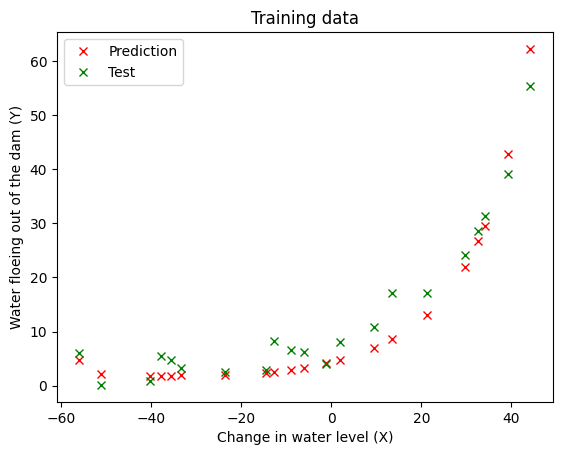

In [27]:
plt.plot(X_test,Y_pred2,'x', color="red")
plt.plot(X_test,Y_test,'x', color="green")
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Prediction', 'Test'])
plt.show()

You can see that the extended model gives a much better result, which fits our data much better. The result is also reflected in the metrics.

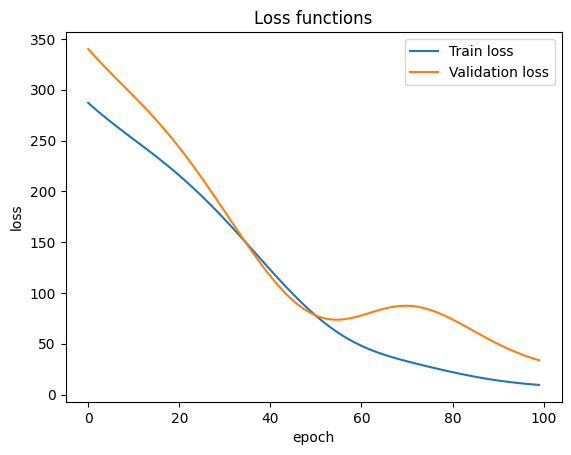

In [28]:
# plotting the metrics
fig = plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'])

Both the cost function of our training data and the cost function of our validation data were significantly lower than in our first attempt.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighBias.png?raw=1" width="600">

You can extend your model further and tune the hyperparameters, but be careful not to fall into the trap of over-learning, as in the model below.

In our case, we chose too many input parameters and ran the learning that way.

In [30]:
#Overfit
Lambda = 0
lr_rate = 0.001
epoch = 100
order=12
optim = optimizers.Adam(lr_rate)

In [31]:
# Train
X_train_p = polyFeatures(X_train, order)                                # polynomial features
X_train_pn, mu, sigma = featureNormalize(X_train_p)                     # feature normalization

# Validation
X_val_p = polyFeatures(X_val, order)
X_val_pn = (X_val_p-mu)/sigma

# Teszt
X_test_p = polyFeatures(X_test, order)
X_test_pn = (X_test_p-mu)/sigma

<ipython-input-15-28297be10fac>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_poly[i-1,j-1] = X[i-1]**j


In [32]:
# Building a linear stack of layers with the sequential model
model3 = Sequential()
model3.add(Dense(order, input_shape=(order,), use_bias=True, kernel_regularizer=regularizers.l2(Lambda)))
model3.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# compiling the sequential model
optim = optimizers.SGD(lr_rate)
model3.compile(loss='MSE', optimizer=optim)

# training the model and saving metrics in history
history3 = model3.fit(X_train_pn, Y_train, epochs=epoch, validation_data=(X_val_pn, Y_val), verbose = 2)

Epoch 1/100
1/1 - 1s - 563ms/step - loss: 285.4513 - val_loss: 336.9756
Epoch 2/100
1/1 - 0s - 300ms/step - loss: 281.3215 - val_loss: 332.2770
Epoch 3/100
1/1 - 0s - 51ms/step - loss: 277.3734 - val_loss: 327.7405
Epoch 4/100
1/1 - 0s - 50ms/step - loss: 273.5724 - val_loss: 323.3316
Epoch 5/100
1/1 - 0s - 58ms/step - loss: 269.8895 - val_loss: 319.0211
Epoch 6/100
1/1 - 0s - 49ms/step - loss: 266.3004 - val_loss: 314.7838
Epoch 7/100
1/1 - 0s - 49ms/step - loss: 262.7844 - val_loss: 310.5980
Epoch 8/100
1/1 - 0s - 55ms/step - loss: 259.3237 - val_loss: 306.4449
Epoch 9/100
1/1 - 0s - 56ms/step - loss: 255.9030 - val_loss: 302.3081
Epoch 10/100
1/1 - 0s - 60ms/step - loss: 252.5093 - val_loss: 298.1731
Epoch 11/100
1/1 - 0s - 53ms/step - loss: 249.1310 - val_loss: 294.0272
Epoch 12/100
1/1 - 0s - 62ms/step - loss: 245.7582 - val_loss: 289.8589
Epoch 13/100
1/1 - 0s - 49ms/step - loss: 242.3821 - val_loss: 285.6583
Epoch 14/100
1/1 - 0s - 52ms/step - loss: 238.9949 - val_loss: 281.4162

In [36]:
Y_pred3 = model3.predict(X_test_pn)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


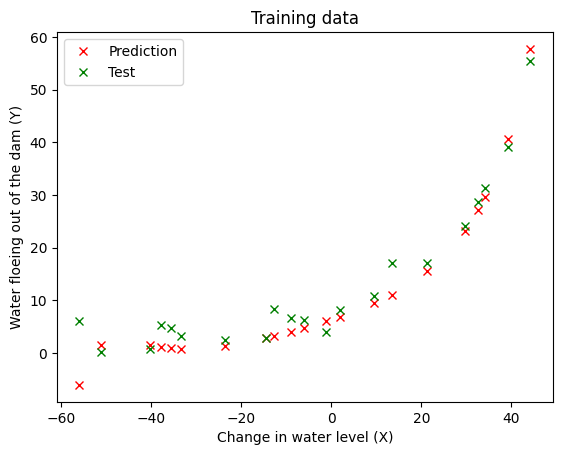

In [37]:
plt.plot(X_test,Y_pred3,'x', color="red")
plt.plot(X_test,Y_test,'x', color="green")
plt.title('Training data')
plt.xlabel('Change in water level (X)')
plt.ylabel('Water floeing out of the dam (Y)')
plt.legend(['Prediction', 'Test'])
plt.show()

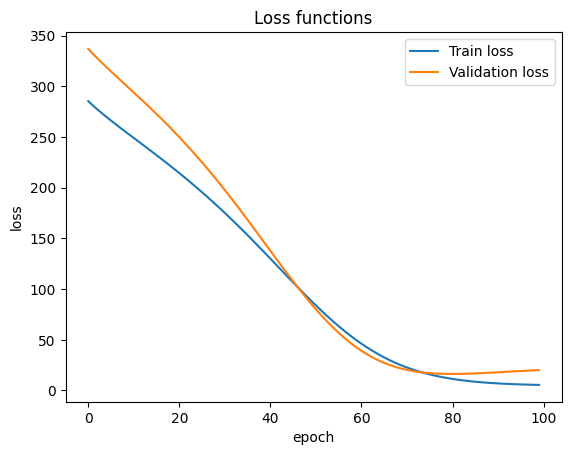

In [38]:
# plotting the metrics
fig = plt.figure()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss functions')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train loss', 'Validation loss'])

It can be seen that the model learns too much on the training samples and after the 60th epoch the cost function of the training samples continues to decrease, but the result on the validation samples starts to deteriorate. This means that although the cost function of the training samples performs well below an expected level, the cost function of the validation and test samples will be well above the expected result. The "scissors are open", there will be a large gap between the two cost functions.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab08/Pics/L08_HighVariance.png?raw=1" width="600">

### 5: Summary and Tips

Underfitting (High Bias problem):
- Adding more input parameters to the model (either independent or polynomial).
- $\lambda$ parameter reduction, i.e. less penalization.
- Increase the epoch number.
- Increase $\alpha$ (learning rate).

Overfitting (High Variance problem):
- Less input parameter.
- Increase the $\lambda$ parameter, i.e. we penalize more.
- More learning samples.
- Reducing $\alpha$ (learning rate).

<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>